In [109]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
data = pd.read_csv('newdata.csv')

In [9]:
data.head()

,Unnamed: 0,Customer,Country,State Code,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
0,0,BU79786,US,KS,276.351928,56274,69,32,5,0,...,0,0,0,0,0,0,1,0,1,0
1,1,HB64268,US,KS,281.369258,43836,73,12,44,0,...,0,1,0,0,0,0,0,0,1,0
2,2,SV62436,US,KS,304.179156,13789,79,8,49,0,...,0,1,0,0,0,0,0,0,1,0
3,3,HO30839,US,KS,534.691658,10511,139,33,64,0,...,0,0,0,0,1,0,0,0,1,0
4,4,AO98601,US,KS,501.888523,54500,63,28,17,0,...,0,0,0,0,0,0,1,0,0,1


In [11]:
data = data.drop(['Unnamed: 0','Customer','Country','State Code'], axis=1)

In [12]:
data.columns

Index(['Claim Amount', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'CPI', 'GDP', 'Total_Fatalities_2011', 'State_Iowa', 'State_Kansas',
       'State_Missouri', 'State_Nebraska', 'State_Oklahoma', 'Response_No',
       'Response_Yes', 'Coverage_Basic', 'Coverage_Extended',
       'Coverage_Premium', 'Education_Bachelor', 'Education_College',
       'Education_Doctor', 'Education_High School or Below',
       'Education_Master', 'EmploymentStatus_Disabled',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed', 'Gender_F',
       'Gender_M', 'Location Code_Rural', 'Location Code_Suburban',
       'Location Code_Urban', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Policy Type_Corporate Auto', 'Policy Type_Personal Auto'

In [13]:
train, test, val = np.split(data.sample(frac=1), [int(.6*len(data)), int(.8*len(data))])

In [14]:
train.shape, test.shape, val.shape

((5480, 68), (1827, 68), (1827, 68))

In [21]:
data.columns[0:]

Index(['Claim Amount', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount',
       'CPI', 'GDP', 'Total_Fatalities_2011', 'State_Iowa', 'State_Kansas',
       'State_Missouri', 'State_Nebraska', 'State_Oklahoma', 'Response_No',
       'Response_Yes', 'Coverage_Basic', 'Coverage_Extended',
       'Coverage_Premium', 'Education_Bachelor', 'Education_College',
       'Education_Doctor', 'Education_High School or Below',
       'Education_Master', 'EmploymentStatus_Disabled',
       'EmploymentStatus_Employed', 'EmploymentStatus_Medical Leave',
       'EmploymentStatus_Retired', 'EmploymentStatus_Unemployed', 'Gender_F',
       'Gender_M', 'Location Code_Rural', 'Location Code_Suburban',
       'Location Code_Urban', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single',
       'Policy Type_Corporate Auto', 'Policy Type_Personal Auto'

In [22]:
#concat list using +
data_string = ' + '.join(data.columns[0:])

In [23]:
data_string

'Claim Amount + Income + Monthly Premium Auto + Months Since Last Claim + Months Since Policy Inception + Number of Open Complaints + Number of Policies + Total Claim Amount + CPI + GDP + Total_Fatalities_2011 + State_Iowa + State_Kansas + State_Missouri + State_Nebraska + State_Oklahoma + Response_No + Response_Yes + Coverage_Basic + Coverage_Extended + Coverage_Premium + Education_Bachelor + Education_College + Education_Doctor + Education_High School or Below + Education_Master + EmploymentStatus_Disabled + EmploymentStatus_Employed + EmploymentStatus_Medical Leave + EmploymentStatus_Retired + EmploymentStatus_Unemployed + Gender_F + Gender_M + Location Code_Rural + Location Code_Suburban + Location Code_Urban + Marital Status_Divorced + Marital Status_Married + Marital Status_Single + Policy Type_Corporate Auto + Policy Type_Personal Auto + Policy Type_Special Auto + Policy_Corporate L1 + Policy_Corporate L2 + Policy_Corporate L3 + Policy_Personal L1 + Policy_Personal L2 + Policy_P

In [19]:
data['Policy_Special L2']

0       0
1       0
2       0
3       0
4       0
       ..
9129    0
9130    0
9131    0
9132    0
9133    0
Name: Policy_Special L2, Length: 9134, dtype: int64

In [46]:
X_train = train.drop(['Claim Amount'], axis=1)
y_train = train['Claim Amount']
X_test = test.drop(['Claim Amount'], axis=1)
y_test = test['Claim Amount']

In [233]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

0. Baseline Model

In [110]:
baseline = np.mean(y_train)
test_pred_baseline = np.repeat(baseline, len(y_test))

In [128]:
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred_baseline))
print('Test RMSE: %.3f' % test_rmse)
test_mae = mean_absolute_error(y_test, test_pred_baseline)
print('Test MAE: %.3f' % test_mae)
test_r2 = r2_score(y_test, test_pred_baseline)
print('Test R2: %.3f' % test_r2)

Test RMSE: 680.581
Test MAE: 444.041
Test R2: -0.000


1. CART Model

In [28]:
## CART
from sklearn.tree import DecisionTreeRegressor

X_train = train.drop(['Claim Amount'], axis=1)
y_train = train['Claim Amount']
cart = DecisionTreeRegressor(max_depth=10)
cart.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [29]:
test_pred_cart = cart.predict(test.drop(['Claim Amount'], axis=1))

In [42]:
train_pred_cart = cart.predict(train.drop(['Claim Amount'], axis=1))

In [111]:
test_rmse_cart = np.sqrt(mean_squared_error(test['Claim Amount'], test_pred_cart))
print('Test RMSE: ', test_rmse_cart)
test_mae_cart = mean_absolute_error(test['Claim Amount'], test_pred_cart)
print('Test MAE: ', test_mae_cart)
test_or2_cart = OSR2(cart, X_test, y_test, y_train)
print('Test OSR2: ', test_or2_cart)

Test RMSE:  445.71809667499593
Test MAE:  169.60076381248606
Test OSR2:  0.5710957761982154


1.1 CART with CV

In [37]:
#cross-validation with custom loss function. Calculate the loss for each hyperparameter (grid values for hyperparameters)
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor  
from sklearn.model_selection import GridSearchCV   

grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'random_state': [88]}

            
dtr = DecisionTreeRegressor()
dtr_cv_acc = GridSearchCV(dtr, param_grid = grid_values, scoring = 'r2', cv=10, verbose=1) # default scoring metric to optimize is accuracy, used as default if none given.

dtr_cv_acc.fit(X_train, y_train)

Fitting 10 folds for each of 201 candidates, totalling 2010 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017 , 0.0175, 0.018 , 0.0185, 0.019 , 0.0195,
       0.02  , 0.020...
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ]),
                         'max_depth': [30], 'min_samples_leaf': [5],
                         'min_samples_split': [20], 'random_state': [88]},
             scoring='r2', verbose=1)

In [38]:
ccp = dtr_cv_acc.cv_results_['param_ccp_alpha'].data
acc = dtr_cv_acc.cv_results_['mean_test_score']
pd.DataFrame({'ccp alpha': ccp, 'Mean R2': acc})

,ccp alpha,Mean R2
0,0.0,0.594105
1,0.0005,0.594105
2,0.001,0.594105
3,0.0015,0.594105
4,0.002,0.594105
...,...,...
196,0.098,0.594101
197,0.0985,0.594101
198,0.099,0.594101
199,0.0995,0.594101


In [39]:
import matplotlib.pyplot as plt

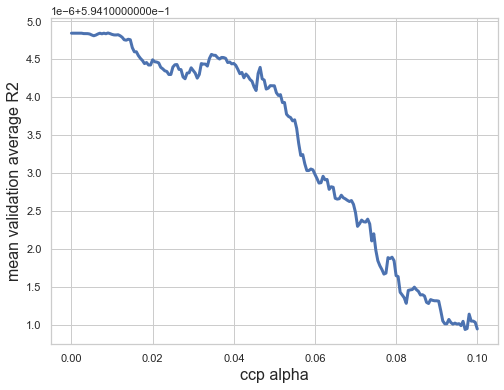

In [220]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation average R2', fontsize=16)
# plt.scatter(ccp, acc, s=1)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.savefig('dtr.png',dpi=500, bbox_inches='tight')

In [200]:
print('Grid best parameter (max R2): ', dtr_cv_acc.best_params_['ccp_alpha'])
print('Grid best score (max R2): ', dtr_cv_acc.best_score_)

Grid best parameter (max R2):  0.009000000000000001
Grid best score (max R2):  0.5941048479911553


In [201]:
test_pred_cartcv = dtr_cv_acc.best_estimator_.predict(X_test)

In [117]:
test_rmse_cartcv = np.sqrt(mean_squared_error(test['Claim Amount'], test_pred_cartcv))
print('Test RMSE: ', test_rmse_cartcv)
test_mae_cartcv = mean_absolute_error(test['Claim Amount'], test_pred_cartcv)
print('Test MAE: ', test_mae_cartcv)
test_or2_cartcv = OSR2(dtr_cv_acc.best_estimator_,X_test,y_test,y_train)
print('Test OSR2: ', test_or2_cartcv)

Test RMSE:  441.0080059537557
Test MAE:  167.82654117174192
Test OSR2:  0.5801127031987681


In [206]:
importance = dtr_cv_acc.best_estimator_.feature_importances_
indices = np.argsort(importance)[::-1]

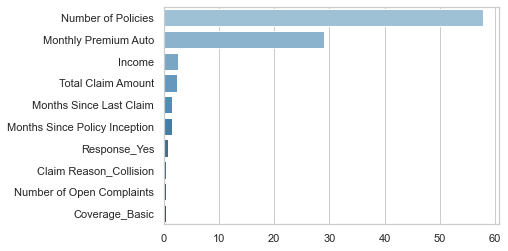

In [207]:
import seaborn as sns
sns.set(style="whitegrid")
sns.barplot(x=100*importance[indices][:10], y=X_train.columns[indices][:10], palette="Blues_d")
plt.savefig('dtr_im.png',dpi=500, bbox_inches='tight')

2. Linear Regression

In [31]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [113]:
test_pred_lm = lm.predict(test.drop(['Claim Amount'], axis=1))
test_rmse_lm = np.sqrt(mean_squared_error(test['Claim Amount'], test_pred_lm))
print('Test RMSE: ', test_rmse_lm)
test_mae_lm = mean_absolute_error(test['Claim Amount'], test_pred_lm)
print('Test MAE: ', test_mae_lm)
test_or2_lm = OSR2(lm, X_test, y_test, y_train)
print('Test OSR2: ', test_or2_lm)

Test RMSE:  633.3793641808883
Test MAE:  390.66086561773056
Test OSR2:  0.13390085873896085


In [133]:
print('Intercept: ', lm.intercept_)
print('Coefficients: ', lm.coef_)

Intercept:  2226.080821366144
Coefficients:  [-3.09911571e-04  6.80784261e+00  5.16809414e-01 -2.77333628e-01
 -3.13748265e+01  8.90459342e+00  1.22071420e-02 -5.45180024e+00
 -1.76246900e-02 -1.96351271e-01  7.11845491e+00  5.79286809e+00
 -4.42305704e+00 -8.88664588e+00  3.98379919e-01  2.75546378e+01
 -2.75546378e+01  8.61771612e+00  6.74682375e+00 -1.53645399e+01
  7.15256785e-01  4.27397125e+00 -2.99742237e+01  1.25703608e+01
  1.24146348e+01 -4.13966335e+01  4.74696262e+01  7.95857242e+00
 -2.86456006e+00 -1.11670051e+01 -1.94880459e+00  1.94880459e+00
  1.26795551e+01 -1.21740242e+01 -5.05530958e-01  3.58786295e+01
  9.97686139e+00 -4.58554909e+01 -2.95545725e+01 -1.72347339e+01
  4.67893065e+01  2.14408344e+01 -4.81579750e+01 -2.83743201e+00
 -1.88286134e+01  1.34001310e+01 -1.18062515e+01  5.39647207e+01
 -4.57554175e+01  3.85800033e+01  7.52293514e+01 -2.31789087e+01
 -6.69232350e+01  1.48727924e+01 -1.47338463e+01 -2.37567621e+00
  1.85549819e+01 -1.44545942e+00 -4.81325802e

In [187]:
indices = np.argsort(lm.coef_)[::-1]

In [188]:
for i in range(10):
    print('%s: %0.3f' % (X_train.columns[indices[i]], lm.coef_[indices[i]]))

Claim Reason_Collision: 75.229
Vehicle Class_Luxury Car: 71.083
Policy_Special L1: 53.965
EmploymentStatus_Employed: 47.470
Policy Type_Special Auto: 46.789
Policy_Special L3: 38.580
Vehicle Size_Small: 36.198
Marital Status_Divorced: 35.879
Response_No: 27.555
Vehicle Class_Sports Car: 27.553


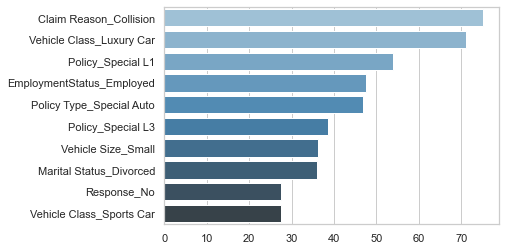

In [196]:
sns.set(style="whitegrid")
sns.barplot(x=lm.coef_[indices][:10], y=X_train.columns[indices][:10], palette="Blues_d")
plt.savefig('lm.png',bbox_inches = 'tight',dpi=500)

In [132]:
import statsmodels.api as sm

#add constant to predictor variables
x = sm.add_constant(X_train)

#fit linear regression model
model = sm.OLS(y_train, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Claim Amount   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     23.28
Date:                Sat, 29 Apr 2023   Prob (F-statistic):          1.90e-182
Time:                        16:06:59   Log-Likelihood:                -42950.
No. Observations:                5480   AIC:                         8.600e+04
Df Residuals:                    5431   BIC:                         8.632e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


3. Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
# Note: you can change the verbose parameter to control how much training progress is printed.
rf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
b

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    2.6s finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [52]:
test_pred_rf = rf.predict(X_test)

In [114]:
rf.verbose = False
test_rmse_rf = np.sqrt(mean_squared_error(y_test, test_pred_rf))
print('Test RMSE: ', test_rmse_rf)
test_mae_rf = mean_absolute_error(y_test, test_pred_rf)
print('Test MAE: ', test_mae_rf)
test_or2_rf = OSR2(rf, X_test, y_test, y_train)
print('Test OSR2: ', test_or2_rf)

Test RMSE:  500.076526074265
Test MAE:  266.8344684706165
Test OSR2:  0.46010074718420735


3.2 RF with CV

In [66]:
import time
from sklearn.model_selection import KFold
grid_values = {'max_features': np.linspace(16,40,24, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf2 = RandomForestRegressor() 
# Note: here we set verbose=2 to keep track of the progress (the running time) of the cross validation. 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=5,verbose=2)
rf_cv.fit(X_train, y_train)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   4.5s
[CV] END max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   3.6s
[CV] END max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   3.2s
[CV] END max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   3.3s
[CV] END max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   3.1s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   3.3s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   3.3s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   3.4s
[CV] END max_features=17, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   3.4s
[CV] END max_features=17, min_samples_

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 40], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='r2', verbose=2)

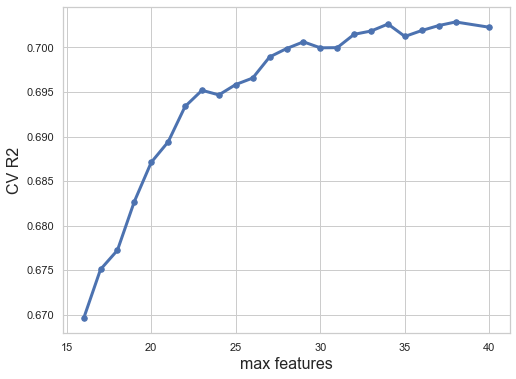

In [197]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([1, 19])
# plt.ylim([0.3, 0.6])
plt.savefig('rf_cv.png',bbox_inches = 'tight',dpi=500)

In [68]:
print(rf_cv.best_params_)

{'max_features': 38, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [246]:
test_pred_rfcv = rf_cv.best_estimator_.predict(X_test)

In [234]:
test_rmse_rf_cv = np.sqrt(mean_squared_error(y_test, rf_cv.best_estimator_.predict(X_test)))
print('Test RMSE: ', test_rmse_rf_cv)
test_mae_rf_cv = mean_absolute_error(y_test, rf_cv.best_estimator_.predict(X_test))
print('Test MAE: ', test_mae_rf_cv)
test_or2_rf_cv = OSR2(rf_cv.best_estimator_, X_test, y_test, y_train)
print('Test OSR2: ', test_or2_rf_cv)

Test RMSE:  376.1996837245073
Test MAE:  154.5941688684095
Test OSR2:  0.6944539731802031


In [70]:
pd.DataFrame({'Feature' : X_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)


,Feature,Importance score
0,Income,2.0
1,Monthly Premium Auto,19.6
2,Months Since Last Claim,2.4
3,Months Since Policy Inception,2.2
4,Number of Open Complaints,0.2
...,...,...
62,Vehicle Class_Sports Car,0.3
63,Vehicle Class_Two-Door Car,0.4
64,Vehicle Size_Large,0.1
65,Vehicle Size_Medsize,0.2


In [221]:
importance = rf_cv.best_estimator_.feature_importances_
indices = np.argsort(importance)[::-1]

In [222]:
X_train.columns[indices][:10]

Index(['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount',
       'Months Since Last Claim', 'Months Since Policy Inception', 'Income',
       'Vehicle Class_Luxury Car', 'Vehicle Class_SUV',
       'Vehicle Class_Luxury SUV', 'Vehicle Class_Four-Door Car'],
      dtype='object')

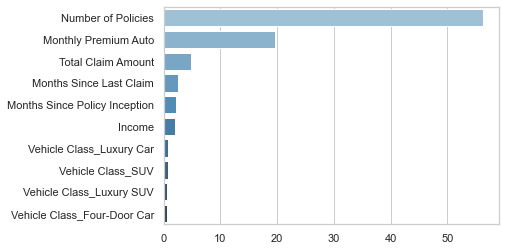

In [223]:
import seaborn as sns
sns.set(style="whitegrid")
sns.barplot(x=100*importance[indices][:10], y=X_train.columns[indices][:10], palette="Blues_d")
plt.savefig('rf_cv_im.png',bbox_inches = 'tight',dpi=500)

4. Blending Model

In [241]:
val_pred_lr = lm.predict(val.drop(['Claim Amount'], axis=1))

In [242]:
val_pred_cart = dtr_cv_acc.best_estimator_.predict(val.drop(['Claim Amount'], axis=1))

In [243]:
val_pred_rf = rf_cv.best_estimator_.predict(val.drop(['Claim Amount'], axis=1))

In [244]:
blend_val_df = pd.DataFrame({'Claim Amount': val['Claim Amount'],'Linear Regression': val_pred_lr, 'CART': val_pred_cart, 'Random Forest': val_pred_rf})

In [245]:
blend_val_df

,Claim Amount,Linear Regression,CART,Random Forest
274,802.106710,712.162414,1411.223628,1178.266080
1900,1030.765258,1079.365479,1024.205889,1019.146099
3933,2265.853652,594.550973,2191.759695,1659.975764
4053,555.830451,710.311813,564.869986,557.020606
7128,282.743885,506.110394,292.531610,274.692138
...,...,...,...,...
6375,555.628228,687.254752,550.092521,547.006236
7935,1597.891049,1179.043190,2573.698235,2189.289891
7772,2367.502939,1614.509964,3769.552454,3524.460657
1040,433.987105,882.800475,434.796943,429.569829


In [228]:
blending_ols = smf.ols(formula='Q("Claim Amount") ~ Q("Linear Regression") + CART + Q("Random Forest") - 1', data=blend_val_df).fit()

In [229]:
blending_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Q("Claim Amount")   R-squared (uncentered):                   0.864
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              3875.
Date:                Tue, 02 May 2023   Prob (F-statistic):                        0.00
Time:                        16:23:28   Log-Likelihood:                         -13577.
No. Observations:                1827   AIC:                                  2.716e+04
Df Residuals:                    1824   BIC:                                  2.718e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Q("Linear Regression")    -0.0005      0.023     -0.022      0.983      -0.046       0.045
CART                       0.1210      0.043      2.805      0.005       0.036       0.206
Q("Random Forest")         0.8861      0.048     18.500      0.000       0.792       0.980
==============================================================================
Omnibus:                     1407.034   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44819.521
Skew:                           3.315   Prob(JB):                         0.00
Kurtosis:                      26.341   Cond. No.                         10.9
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [256]:
blend_test_df = pd.DataFrame({'Claim Amount': test['Claim Amount'],'Linear Regression': test_pred_lm, 'CART': test_pred_cartcv, 'Random Forest': test_pred_rfcv})

In [257]:
test_rmse_blending = np.sqrt(mean_squared_error(test['Claim Amount'], blending_ols.predict(blend_test_df)))
print('Test RMSE: ', test_rmse_blending)
test_mae_blending = mean_absolute_error(test['Claim Amount'], blending_ols.predict(blend_test_df))
print('Test MAE: ', test_mae_blending)
test_or2_blending = OSR2(blending_ols, blend_test_df, y_test, y_train)
print('Test OSR2: ', test_or2_blending)

Test RMSE:  377.8913537440856
Test MAE:  155.94189251247656
Test OSR2:  0.6916998762552968


In [258]:
model_list = ['Baseline','Linear Regression','CART','CART with CV','Random Forest','Random Forest with CV','Blending']

In [259]:
metrics_df = pd.DataFrame({'Model': model_list, 'RMSE': [test_rmse, test_rmse_lm, test_rmse_cart, test_rmse_cartcv, test_rmse_rf, test_rmse_rf_cv, test_rmse_blending], 'MAE': [test_mae,test_mae_lm, test_mae_cart, test_mae_cartcv, test_mae_rf, test_mae_rf_cv, test_mae_blending], 'OSR2': [test_r2, test_or2_lm, test_or2_cart, test_or2_cartcv, test_or2_rf, test_or2_rf_cv, test_or2_blending]})

In [260]:
metrics_df['RMSE'] = metrics_df['RMSE'].round(3)
metrics_df['MAE'] = metrics_df['MAE'].round(3)
metrics_df['OSR2'] = metrics_df['OSR2'].round(3)

In [261]:
metrics_df

,Model,RMSE,MAE,OSR2
0,Baseline,376.200,154.594,-0.000
1,Linear Regression,633.379,390.661,0.134
2,CART,445.718,169.601,0.571
3,CART with CV,441.008,167.827,0.580
4,Random Forest,500.077,266.834,0.460
5,Random Forest with CV,376.200,154.594,0.694
6,Blending,377.891,155.942,0.692


Analysis of Blending results

Boostrap Analysis

In [143]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [144]:
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

In [215]:
def RMSE(y_pred, y_true, y_train):
    return np.sqrt(mean_squared_error(y_true, y_pred))
def MAE(y_pred, y_true, y_train):
    return mean_absolute_error(y_true, y_pred)
def OSR2(y_pred, y_true, y_train):
    return 1 - (np.sum((y_true-y_pred)**2)/np.sum((y_true-y_train.mean())**2))

In [148]:
bs_output = bootstrap_validation(X_test,y_test,y_train,rf_cv.best_estimator_,
                                 metrics_list=[RMSE, MAE, OSR2],
                                 sample = 10)

(10, 3)


In [149]:
bs_output = bootstrap_validation(X_test,y_test,y_train,rf_cv.best_estimator_,
                                 metrics_list=[RMSE, MAE, OSR2],
                                 sample = 1000)

(1000, 3)


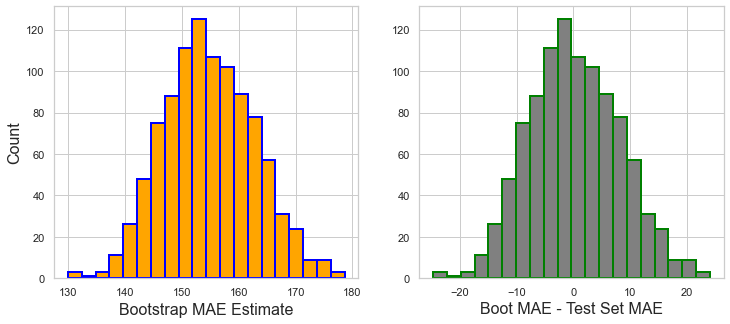

In [208]:
## Visualize the bootstrap validation accuracy results
test_mae = MAE(rf_cv.best_estimator_.predict(X_test),y_test,y_train)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap MAE Estimate', fontsize=16)
axs[1].set_xlabel('Boot MAE - Test Set MAE', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,1], bins=20,edgecolor='blue', linewidth=2,color = "orange")
# axs[0].set_xlim([0.4,0.7])
axs[1].hist(bs_output.iloc[:,1]-test_mae, bins=20,edgecolor='green', linewidth=2,color = "grey")
# axs[1].set_xlim([-0.15,0.15])
plt.savefig('bs_mae.png',bbox_inches = 'tight',dpi=500)

In [226]:
# The 95% confidence interval
CI= np.quantile(bs_output.iloc[:,1]-test_mae,np.array([0.025,0.975]))
print("The 95-percent confidence interval of Test MAE is %s" % CI)

The 95-percent confidence interval of Test MAE is [-14.00661157  16.211757  ]


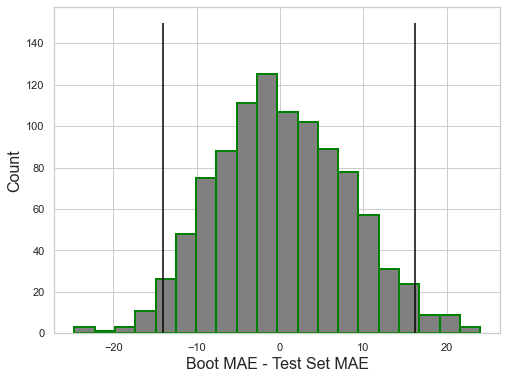

In [227]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot MAE - Test Set MAE', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,1]-test_mae, bins=20,edgecolor='green', linewidth=2,color = "grey")
# axs.set_xlim([-0.15,0.15])
axs.vlines(x=CI[0], ymin=0, ymax=150,color = "black")
axs.vlines(x=CI[1], ymin=0, ymax=150,color = "black")
plt.savefig('bs_mae_ci.png',bbox_inches = 'tight',dpi=500)

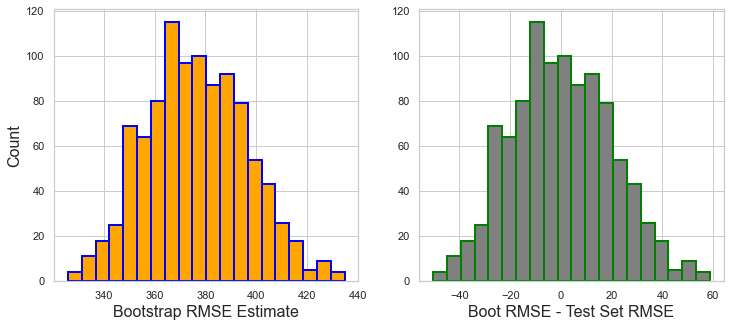

In [210]:
## Visualize the bootstrap validation TPR results
test_rmse = RMSE(rf_cv.best_estimator_.predict(X_test),y_test,y_train)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap RMSE Estimate', fontsize=16)
axs[1].set_xlabel('Boot RMSE - Test Set RMSE', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,0], bins=20,edgecolor='blue', linewidth=2,color = "orange")
# axs[0].set_xlim([0.4,0.7])
axs[1].hist(bs_output.iloc[:,0]-test_rmse, bins=20,edgecolor='green', linewidth=2,color = "grey")
# axs[1].set_xlim([-0.15,0.15])
plt.savefig('bs_rmse.png',bbox_inches = 'tight',dpi=500)

In [212]:
# The 95% confidence interval
CI= np.quantile(bs_output.iloc[:,0]-test_rmse,np.array([0.025,0.975]))
print("The 95-percent confidence interval of Test Accuracy is %s" % CI)

The 95-percent confidence interval of Test Accuracy is [-36.35382893  39.25664129]


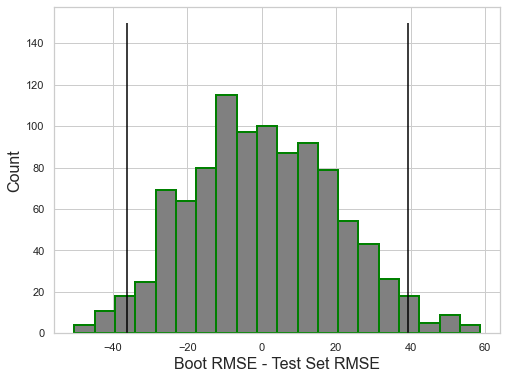

In [213]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot RMSE - Test Set RMSE', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,0]-test_rmse, bins=20,edgecolor='green', linewidth=2,color = "grey")
# axs.set_xlim([-0.15,0.15])
axs.vlines(x=CI[0], ymin=0, ymax=150,color = "black")
axs.vlines(x=CI[1], ymin=0, ymax=150,color = "black")
plt.savefig('bs_rmse_ci.png',bbox_inches = 'tight',dpi=500)

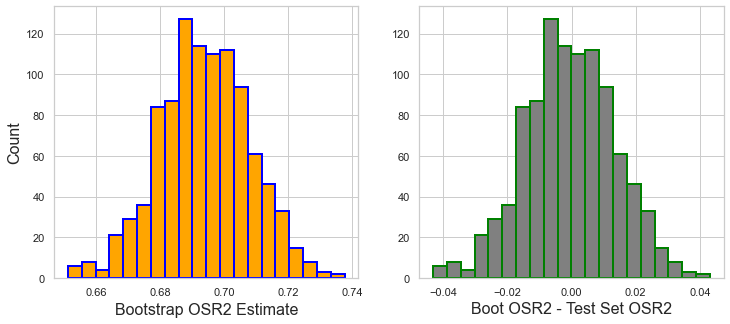

In [216]:
## Visualize the bootstrap validation TPR results
test_osr2 = OSR2(rf_cv.best_estimator_.predict(X_test),y_test,y_train)

fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap OSR2 Estimate', fontsize=16)
axs[1].set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output.iloc[:,2], bins=20,edgecolor='blue', linewidth=2,color = "orange")
# axs[0].set_xlim([0.4,0.7])
axs[1].hist(bs_output.iloc[:,2]-test_osr2, bins=20,edgecolor='green', linewidth=2,color = "grey")
# axs[1].set_xlim([-0.15,0.15])
plt.savefig('bs_osr2.png',bbox_inches = 'tight',dpi=500)

In [217]:
# The 95% confidence interval
CI= np.quantile(bs_output.iloc[:,2]-test_osr2,np.array([0.025,0.975]))
print("The 95-percent confidence interval of Test Accuracy is %s" % CI)

The 95-percent confidence interval of Test Accuracy is [-0.02931326  0.02689122]


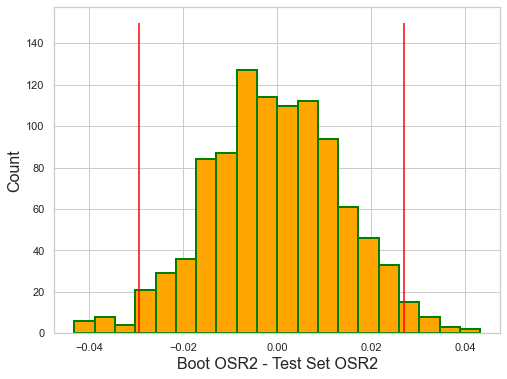

In [218]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot OSR2 - Test Set OSR2', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output.iloc[:,2]-test_osr2, bins=20,edgecolor='green', linewidth=2,color = "orange")
# axs.set_xlim([-0.15,0.15])
axs.vlines(x=CI[0], ymin=0, ymax=150,color = "red")
axs.vlines(x=CI[1], ymin=0, ymax=150,color = "red")
plt.savefig('bs_osr2_ci.png',bbox_inches = 'tight',dpi=500)